In [34]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, io
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
from skimage.transform import rotate

image dim: (525, 660)


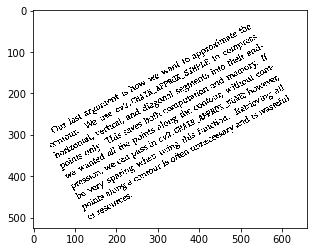

file: neg_28.png
min cost:  [ -2.80000000e+01   7.95770919e+05]


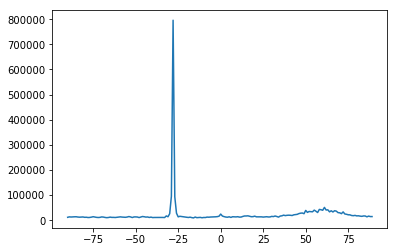

image dim: (317, 620)


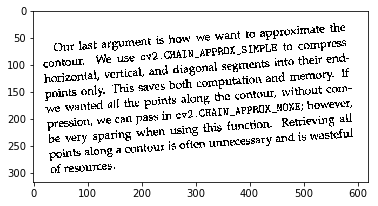

file: neg_4.png
min cost:  [ -4.00000000e+00   7.85559602e+05]


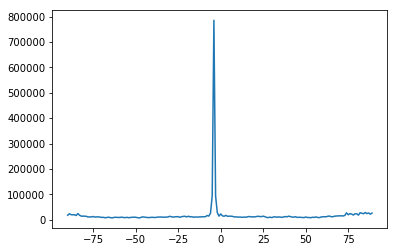

image dim: (495, 662)


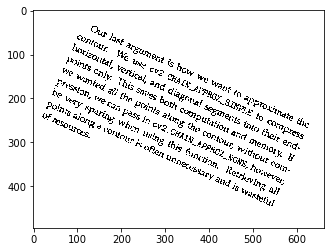

file: pos_24.png
min cost:  [  2.40000000e+01   7.89731659e+05]


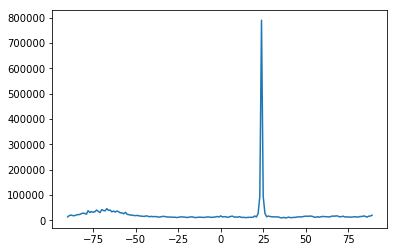

image dim: (601, 634)


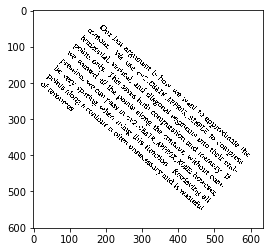

file: pos_41.png
min cost:  [  4.10000000e+01   8.05584845e+05]


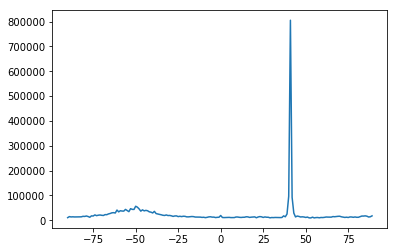

image dim: (184, 300)


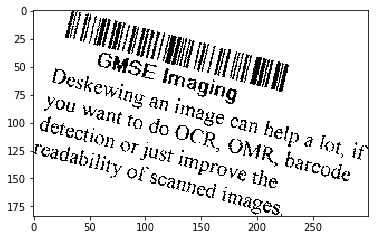

file: sample1.png
min cost:  [  1.40000000e+01   5.70334397e+04]


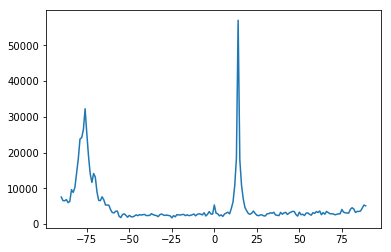

image dim: (1024, 727)


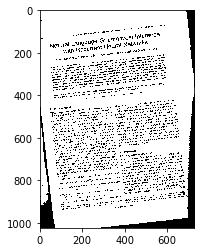

file: sample2.png
min cost:  [ -6.00000000e+00   1.39682851e+06]


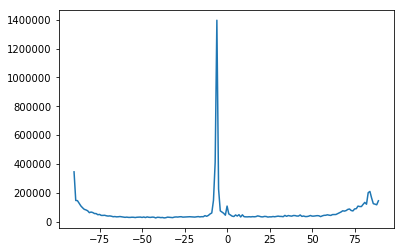

In [87]:
def objective_function(img):
    projection = np.sum(img, axis=1)
    diffs = np.diff(projection)
    return np.square(diffs).sum()

def find_rotation_angle(input_image_file):
#    input_image_file = 'neg_28.png'
#     input_image_file = 'pos_24.png'
    img = io.imread(input_image_file)
    img = rgb2gray(img)
    thresh = threshold_otsu(img)
    img = img > thresh #binarize

    print("image dim:", img.shape)

    # plt.hist(img.ravel().astype(int))
    # plt.show()

    # plt.hist(binary.ravel().astype(int))
    # plt.show()

    plt.imshow(img, cmap='gray')
    plt.show()

    angles = np.arange(-90.0, 90.0, 1.0)
    costs = np.empty((len(angles), 2))
    i = 0
    for angle in angles:
        rotated_img = rotate(img, angle, cval=1)
        costs[i][0] = angle
        costs[i][1] = objective_function(rotated_img)
        i += 1

    print("file:", input_image_file)
    print("max objective function: ", costs[costs.argmax(axis=0)[1]])
    plt.plot(costs[:, 0], costs[:, 1])
    plt.show()
    plt.clf()

def main():
    files = [
        'neg_28.png',
        'neg_4.png',
        'pos_24.png',
        'pos_41.png',
        'sample1.png',
        'sample2.png',
    ]
    
    for f in files:
        find_rotation_angle(f)
    
main()

In [77]:
costs[:,0]

array([  0.00000000e+000,   0.00000000e+000,   6.94905605e-310,
         6.94905605e-310,   6.94905605e-310,   6.94905605e-310,
         6.94905605e-310,   6.94905605e-310,   6.94905605e-310,
         6.94905605e-310,   6.94905605e-310,   6.94905605e-310,
         6.94905605e-310,   6.94905605e-310,   6.94905605e-310,
         6.94905605e-310,   6.94905605e-310,   6.94905605e-310,
         6.94905605e-310,   6.94905605e-310,   6.94905605e-310,
         6.94905605e-310,   6.94905605e-310,   6.94905605e-310,
         6.94905605e-310,   6.94905605e-310,   6.94905605e-310,
         6.94905605e-310,   6.94905605e-310,   6.94905605e-310,
         6.94905605e-310,   6.94905605e-310,   6.94905605e-310,
         6.94905605e-310,   6.94905605e-310,   6.94905605e-310,
         6.94905605e-310,   6.94905605e-310,   6.94905605e-310,
         6.94905605e-310,   6.94905605e-310,   6.94905605e-310,
         6.94905605e-310,   6.94905605e-310,   6.94905605e-310,
         6.94905605e-310,   6.94905605e-

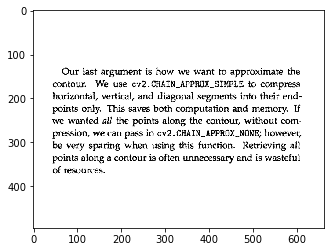

In [63]:
input_image_file = 'pos_24.png'
img = io.imread(input_image_file)
img = rgb2gray(img)
thresh = threshold_otsu(img)
img = img > thresh #binarize
plt.imshow(rotate(img, 24, cval=1), cmap='gray')
plt.show()